In [18]:
import pandas as pd

## Preprocessing

In [19]:
# Load the data from Excel file
data = pd.read_excel('Survey.xlsx')

In [20]:
numerical_questions= data[['Q1', 'Q13', 'Q14', 'Q15', 'Q6','Q8','Q22','Q24','Q25']]

In [21]:
# Convert all columns to numerical type
numerical_questions_df = numerical_questions.drop(0)

numerical_questions_df = numerical_questions_df.apply(pd.to_numeric, errors='coerce')

In [22]:
numerical_questions_df.dtypes

Q1       int64
Q13      int64
Q14      int64
Q15      int64
Q6     float64
Q8       int64
Q22    float64
Q24    float64
Q25    float64
dtype: object

Check NAs

In [23]:
# Check for NA values
na_percentage = numerical_questions_df.isna().any(axis=1).mean() * 100

# Print the percentage of rows with any NA values
print(f"Percentage of rows with any NA values: {na_percentage:.2f}%")

# Drop rows with NA values
numerical_questions_df = numerical_questions_df.dropna()

Percentage of rows with any NA values: 1.67%


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
numerical_questions_df

,Q1,Q13,Q14,Q15,Q6,Q8,Q22,Q24,Q25
1,10,10,10,10,9.0,10,9.0,10.0,10.0
2,10,8,10,10,10.0,10,8.0,8.0,8.0
3,9,8,9,10,9.0,10,8.0,9.0,10.0
4,7,8,8,7,10.0,10,10.0,10.0,10.0
5,9,8,9,7,8.0,8,7.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...
1435,10,8,8,9,10.0,10,9.0,10.0,10.0
1436,8,8,9,8,10.0,10,1.0,9.0,10.0
1437,10,10,10,10,10.0,10,8.0,10.0,10.0
1438,9,8,10,10,10.0,10,7.0,10.0,9.0


## Basic Exploratory Analysis with Histograms

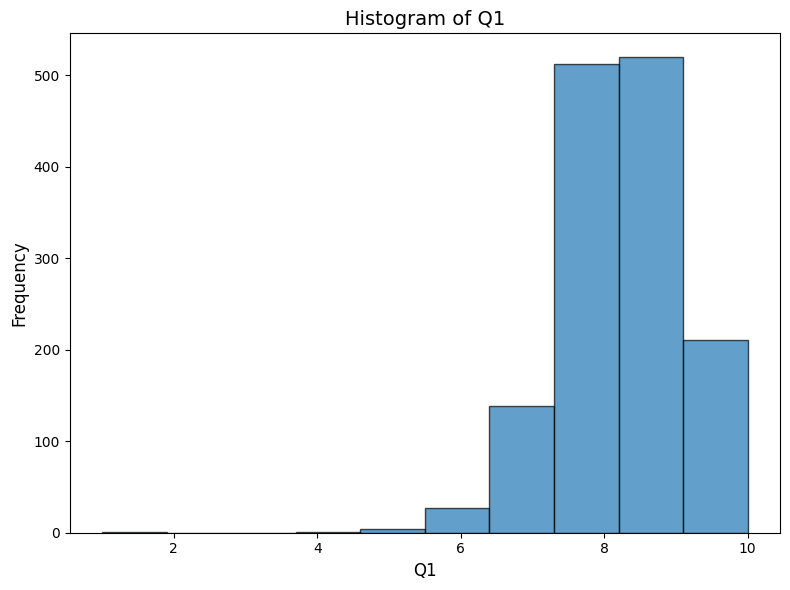

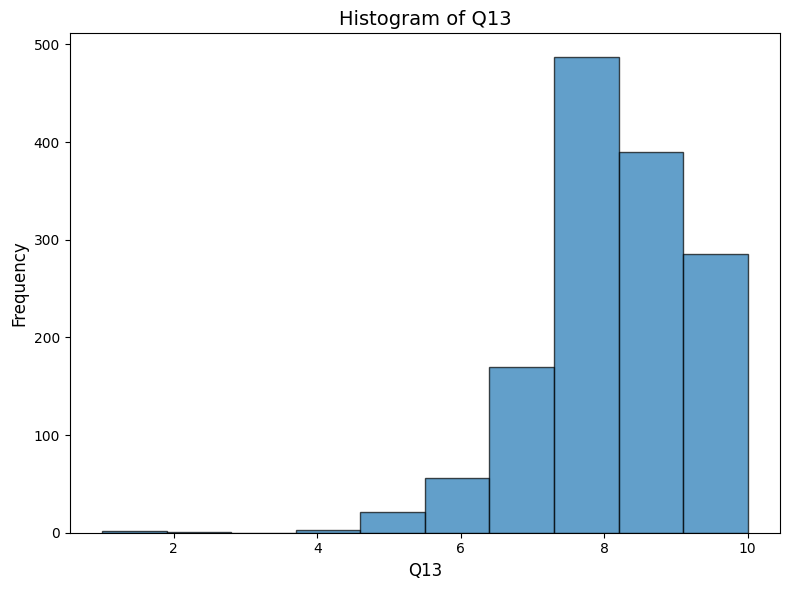

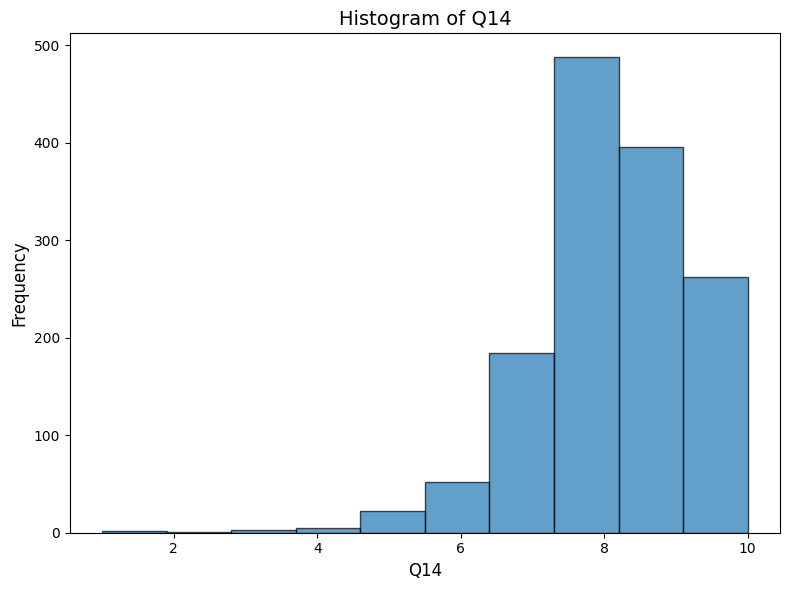

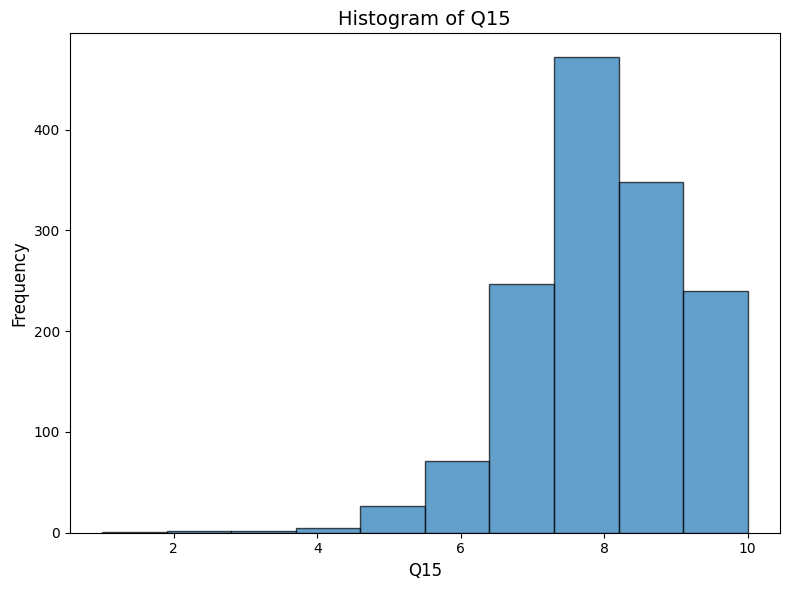

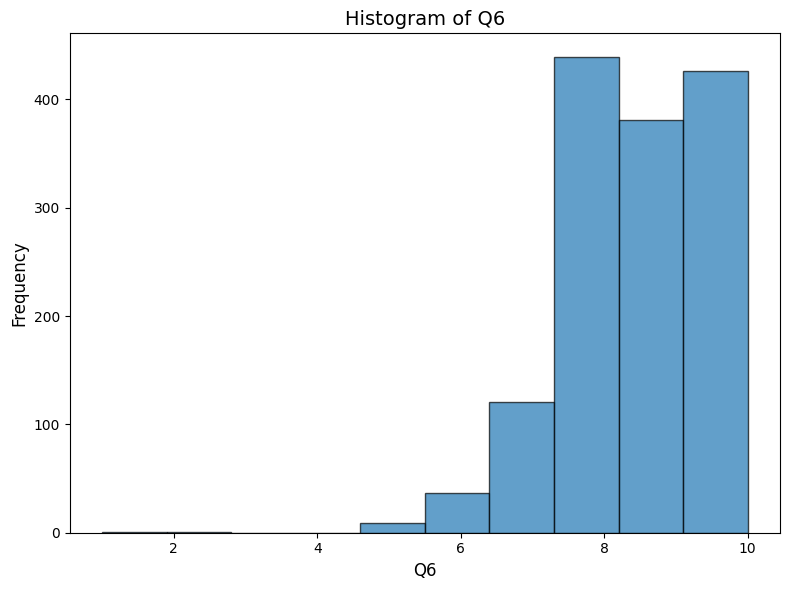

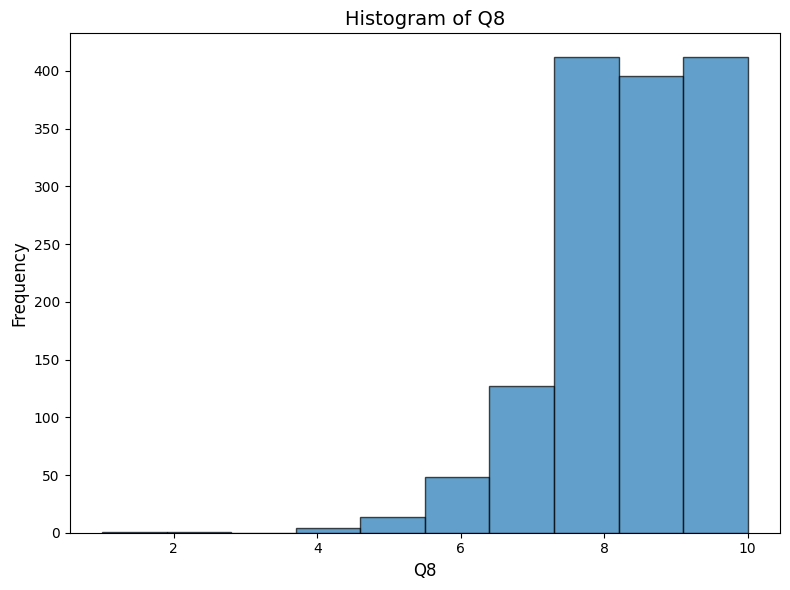

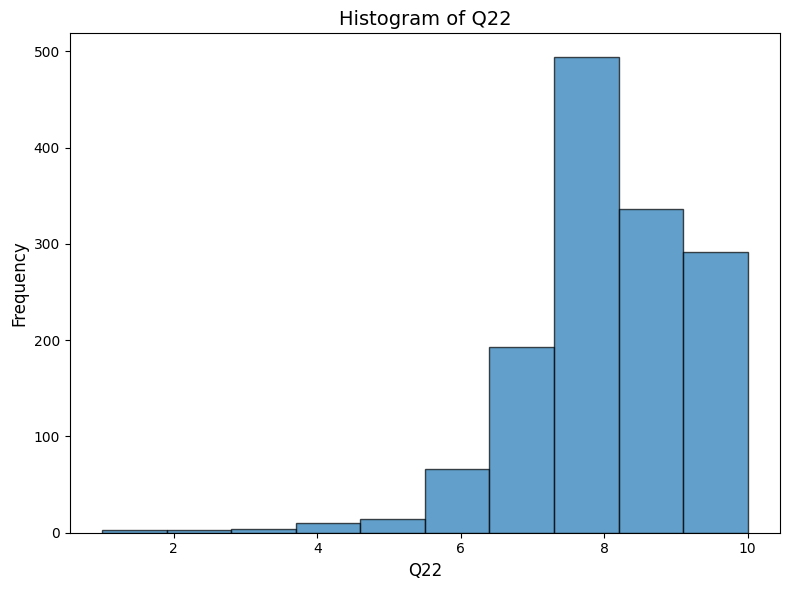

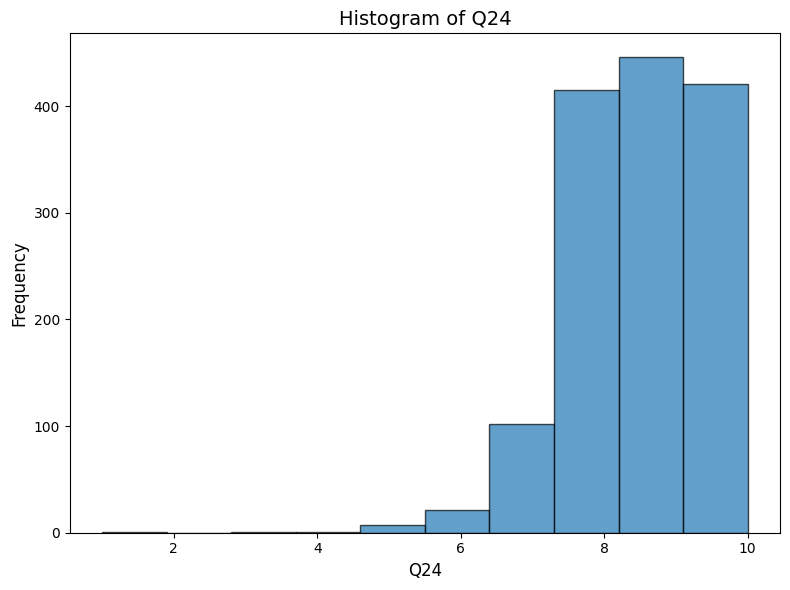

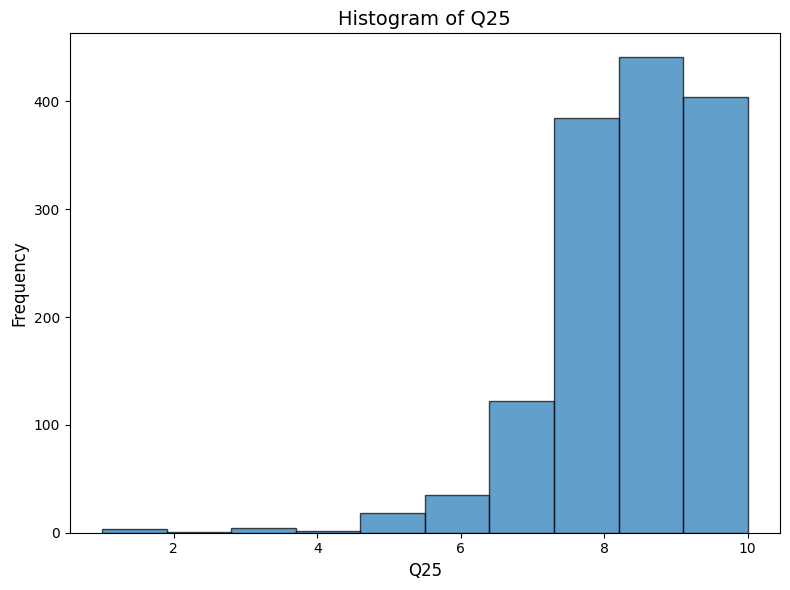

In [26]:
# Plot histograms for each column
for column in numerical_questions_df.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(numerical_questions_df[column], bins=10, edgecolor='black', alpha=0.7)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Histogram of {}'.format(column), fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()


## Preliminary Statistical Analysis 

Descriptive Statistics

In [27]:
from tabulate import tabulate

# Assuming your clean DataFrame is named 'df'
# If necessary, replace 'df' with the actual name of your DataFrame

# Calculate mean, median, and standard deviation for each question
descriptive_stats = numerical_questions_df.describe()

# Extract the desired statistics (mean, median, and standard deviation)
mean = descriptive_stats.loc['mean']
median = descriptive_stats.loc['50%']  # Equivalent to 'median'
std_dev = descriptive_stats.loc['std']

# Create a table for the descriptive statistics
table = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std_dev})

# Format the table
table.index.name = 'Question'
table.reset_index(inplace=True)

# Convert the table to a nicely formatted string
table_str = tabulate(table, headers='keys', tablefmt='github')

# Print the table
print(table_str)

|    | Question   |    Mean |   Median |   Standard Deviation |
|----|------------|---------|----------|----------------------|
|  0 | Q1         | 8.51307 |        9 |             0.973303 |
|  1 | Q13        | 8.41201 |        8 |             1.20548  |
|  2 | Q14        | 8.36113 |        8 |             1.22978  |
|  3 | Q15        | 8.21837 |        8 |             1.26578  |
|  4 | Q6         | 8.7053  |        9 |             1.1333   |
|  5 | Q8         | 8.65442 |        9 |             1.19878  |
|  6 | Q22        | 8.32085 |        8 |             1.31801  |
|  7 | Q24        | 8.78233 |        9 |             1.06472  |
|  8 | Q25        | 8.66996 |        9 |             1.2362   |


Correlation

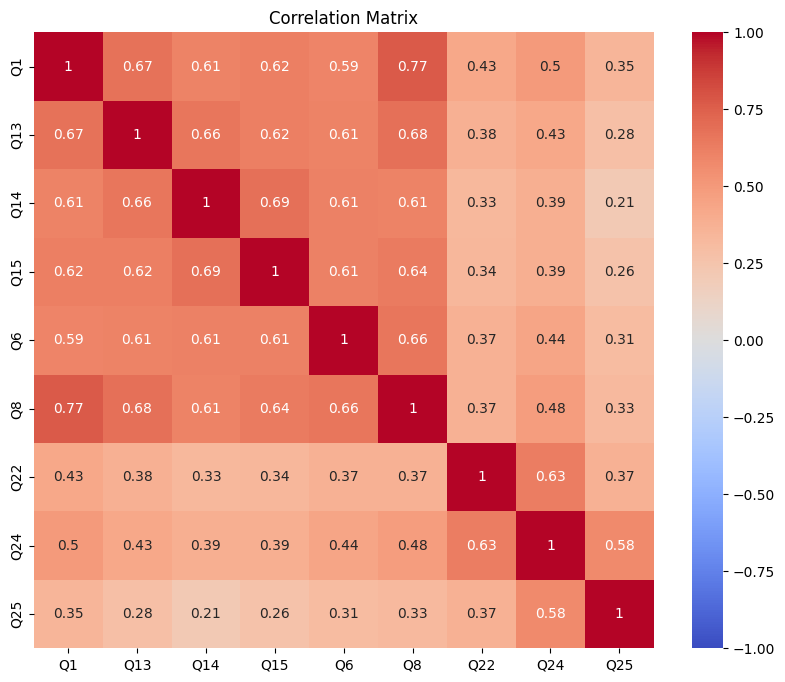

╒═════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════╕
│     │       Q1 │      Q13 │      Q14 │      Q15 │       Q6 │       Q8 │      Q22 │      Q24 │      Q25 │
╞═════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╡
│ Q1  │ 1        │ 0.673207 │ 0.609058 │ 0.624247 │ 0.594952 │ 0.766687 │ 0.426186 │ 0.497519 │ 0.345969 │
├─────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ Q13 │ 0.673207 │ 1        │ 0.660936 │ 0.620919 │ 0.607634 │ 0.684885 │ 0.375207 │ 0.427524 │ 0.283514 │
├─────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ Q14 │ 0.609058 │ 0.660936 │ 1        │ 0.686215 │ 0.614801 │ 0.607128 │ 0.330315 │ 0.389008 │ 0.213826 │
├─────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ Q15 │ 0.624247 │ 0.620919 │ 0.68621

In [28]:
correlation_matrix = numerical_questions_df.corr(method='pearson')

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

print(tabulate(correlation_matrix, headers='keys', tablefmt='fancy_grid'))

Redundant Questions: 

Questions with high correlations (e.g., correlation coefficients close to 1) may indicate redundancy or overlap in the information they capture. For instance, Q6 and Q8 have a correlation coefficient of 0.657, indicating a moderate positive correlation. This suggests that these questions might be measuring similar constructs or aspects of the same underlying concept.

## Machine Learning Clustering Analysis

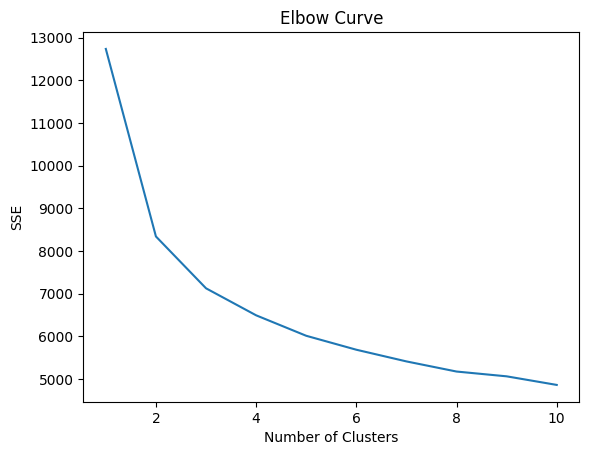

In [29]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_questions_df)

# Determine the optimal number of clusters using the Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Curve')
plt.show()


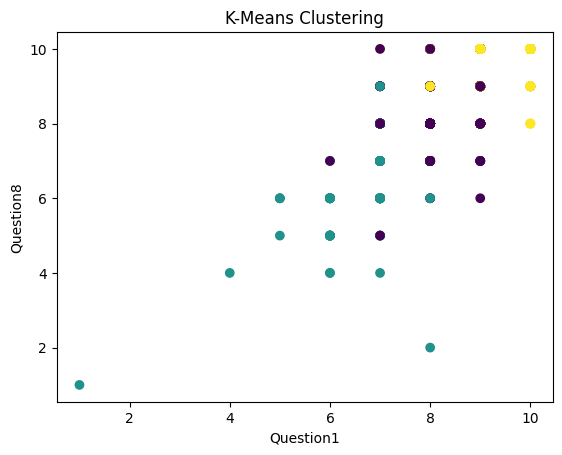

In [30]:

scaler = StandardScaler()
normalized_data = scaler.fit_transform(numerical_questions_df)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3)  # You can adjust the number of clusters as per your requirements
kmeans.fit(normalized_data)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Assign cluster labels to the original DataFrame
numerical_questions_df['Cluster'] = cluster_labels


plt.scatter(numerical_questions_df['Q1'], numerical_questions_df['Q8'], c=cluster_labels)
plt.xlabel('Question1')
plt.ylabel('Question8')
plt.title('K-Means Clustering')
plt.show()


In [31]:
# Identify potentially redundant questions within each cluster
redundant_questions = []
for cluster_id in range(kmeans.n_clusters):
    cluster_data = numerical_questions_df[numerical_questions_df['Cluster'] == cluster_id]
    cluster_corr = cluster_data[numerical_questions_df.columns].corr()
    redundant_pairs = []

    # Find highly correlated question pairs within the cluster
    for i in range(len(cluster_corr.columns)):
        for j in range(i + 1, len(cluster_corr.columns)):
            if abs(cluster_corr.iloc[i, j]) >= 0.67:  # Adjust the correlation threshold as needed
                redundant_pairs.append((cluster_corr.columns[i], cluster_corr.columns[j]))

    # Add the potentially redundant questions to the list
    for pair in redundant_pairs:
        redundant_questions.extend(pair)

# Deduplicate and print the potentially redundant questions
redundant_questions = list(set(redundant_questions))
print("Most likely redundant questions:")
for question in redundant_questions:
    print(question)




Most likely redundant questions:
Q1
Q25
Q8
Q24


In [32]:
# Identify potentially redundant questions within each cluster
redundant_questions = []
for cluster_id in range(kmeans.n_clusters):
    cluster_data = numerical_questions_df[numerical_questions_df['Cluster'] == cluster_id]
    cluster_corr = cluster_data[numerical_questions_df.columns].corr()
    redundant_pairs = []

    # Find highly correlated question pairs within the cluster
    for i in range(len(cluster_corr.columns)):
        for j in range(i + 1, len(cluster_corr.columns)):
            if abs(cluster_corr.iloc[i, j]) >= 0.5:  # Adjust the correlation threshold as needed
                redundant_pairs.append((cluster_corr.columns[i], cluster_corr.columns[j]))

    # Add the potentially redundant questions to the list
    for pair in redundant_pairs:
        redundant_questions.extend(pair)

# Deduplicate and print the potentially redundant questions
redundant_questions = list(set(redundant_questions))
print("Likely redundant questions:")
for question in redundant_questions:
    print(question)

Likely redundant questions:
Q8
Q25
Q15
Q14
Q1
Q22
Q24


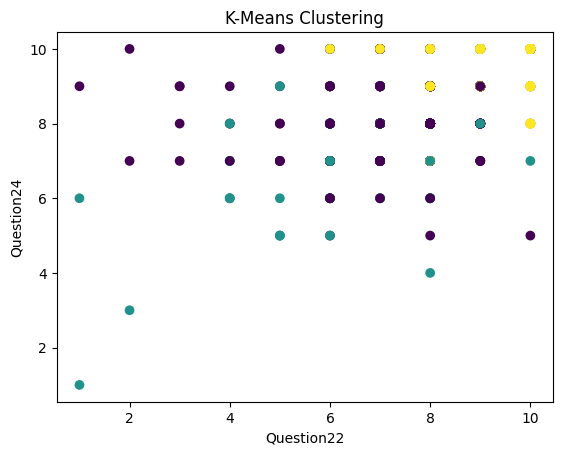

In [33]:
plt.scatter(numerical_questions_df['Q22'], numerical_questions_df['Q24'], c=cluster_labels)
plt.xlabel('Question22')
plt.ylabel('Question24')
plt.title('K-Means Clustering')
plt.show()


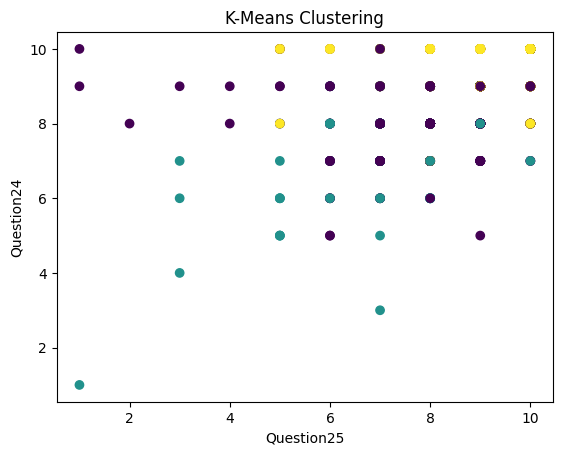

In [34]:
plt.scatter(numerical_questions_df['Q25'], numerical_questions_df['Q24'], c=cluster_labels)
plt.xlabel('Question25')
plt.ylabel('Question24')
plt.title('K-Means Clustering')
plt.show()

## Factor Analysis

In [35]:
numerical_questions_df= numerical_questions_df[['Q1', 'Q13', 'Q14', 'Q15', 'Q6','Q8','Q22','Q24','Q25']]

In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

column_names = numerical_questions_df.columns

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_questions_df)

# Perform PCA
pca = PCA()
pca.fit(data_scaled)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each component
for i, ratio in enumerate(explained_variance_ratio):
        print(f"Explained Variance Ratio for Component {i+1}: {ratio:.4f}")

# Get the factor loadings
factor_loadings = pd.DataFrame(pca.components_.T, index=column_names, columns=[f"Factor {i+1}" for i in range(len(numerical_questions_df.columns))])

# Print the factor loadings
print("Factor Loadings:")
print(tabulate(factor_loadings, headers='keys', tablefmt='psql'))



Explained Variance Ratio for Component 1: 0.5605
Explained Variance Ratio for Component 2: 0.1406
Explained Variance Ratio for Component 3: 0.0699
Explained Variance Ratio for Component 4: 0.0526
Explained Variance Ratio for Component 5: 0.0458
Explained Variance Ratio for Component 6: 0.0398
Explained Variance Ratio for Component 7: 0.0355
Explained Variance Ratio for Component 8: 0.0310
Explained Variance Ratio for Component 9: 0.0242
Factor Loadings:
+-----+------------+------------+-------------+------------+-------------+------------+------------+------------+------------+
|     |   Factor 1 |   Factor 2 |    Factor 3 |   Factor 4 |    Factor 5 |   Factor 6 |   Factor 7 |   Factor 8 |   Factor 9 |
|-----+------------+------------+-------------+------------+-------------+------------+------------+------------+------------|
| Q1  |  -0.375522 |  0.0945134 | -0.0460071  | -0.52466   | -0.155674   |  0.240643  | -0.0580402 |  0.354164  |  0.601433  |
| Q13 |  -0.363111 |  0.196995  | 

Based on the factor loadings and the explained variance ratios of the components obtained from the PCA, here are some insights and recommendations:

Explained Variance:

- Component 1 explains the highest variance (56.05%), followed by Component 2 (14.06%).
- The explained variance decreases with each subsequent component, with Component 9 explaining the least variance (2.42%).

Factor Loadings:

- Factor loadings represent the strength and direction of the relationship between each question and each factor.
- Questions with higher absolute factor loadings on a particular factor are more strongly associated with that factor.

Redundant Questions:

Based on the factor loadings, it appears that there are some questions with high loadings on the same factor, indicating redundancy.
 - For example, questions Q13, Q14, and Q15 have relatively high loadings on Factor 1, suggesting that they may be measuring similar aspects of the construct.
 - Similarly, questions Q22, Q24, and Q25 have relatively high loadings on Factor 3, indicating potential redundancy.
 - Note that even if Factor 9 was the least variance that means that Q1 and Q8 follow the behaviour of Factor 9 which is static.

Based on these insights, here are some recommendations for eliminating redundant questions:

- Consider removing one or two questions from the group (Q13, Q14, Q15) that have high loadings on Factor 1. Choose the question(s) that are less critical or provide less unique information compared to the others.

- Evaluate the relevance and redundancy of questions Q22, Q24, and Q25, which show high loadings on Factor 3. If these questions cover similar aspects of the construct, you may consider eliminating one or two of them.

Remember, these recommendations are based on statistical patterns and redundancy analysis. It's important to carefully assess the content and validity of each question before making any final decisions.

FINAL CONCLUSION

Questions from the following clusters could be evaluated to be removed based on the significance

- High: Q1, Q8

- Mid: Q22, Q24, and Q25

- Low: Q13, Q14, Q15

CC Klaus Garrido 